Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
Warning message:
"package 'data.table' was built under R version 4.1.3"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble 3.1.6     v purrr  0.3.4

Warning messa

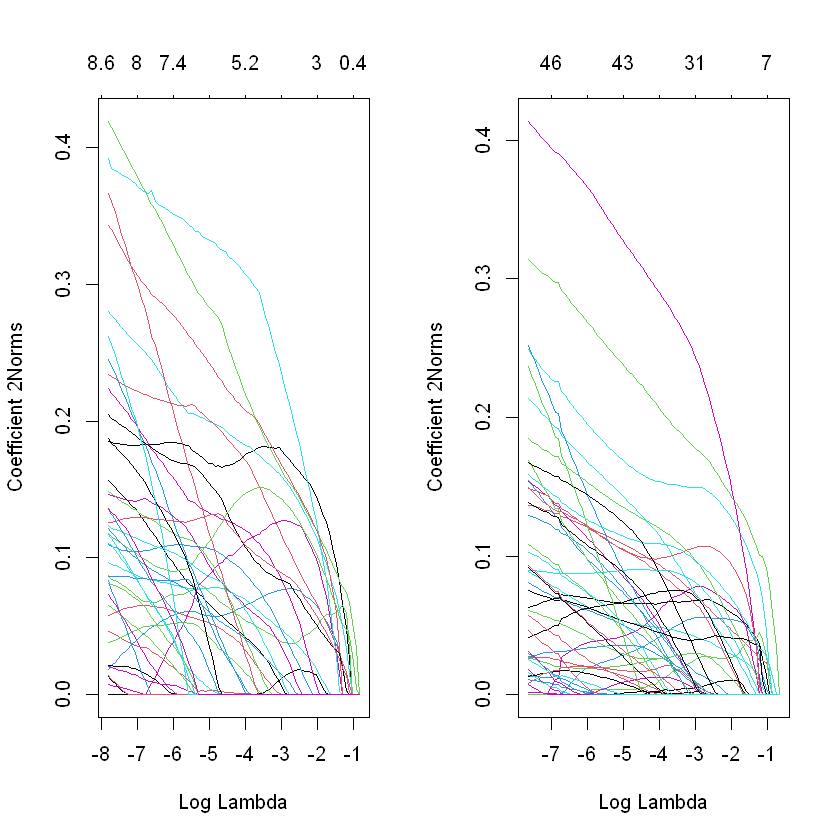

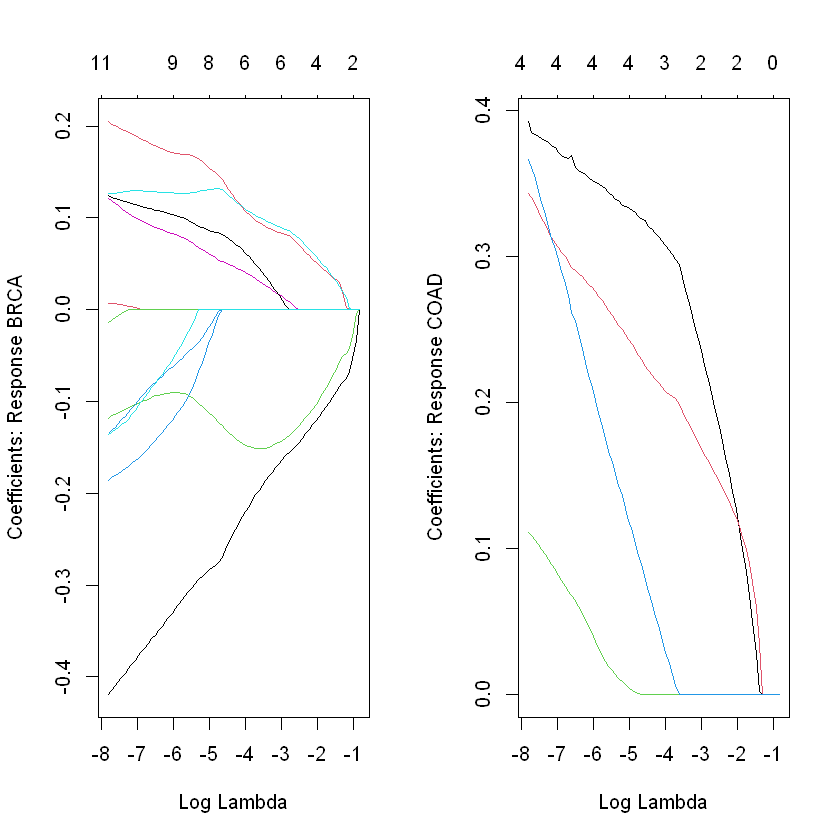

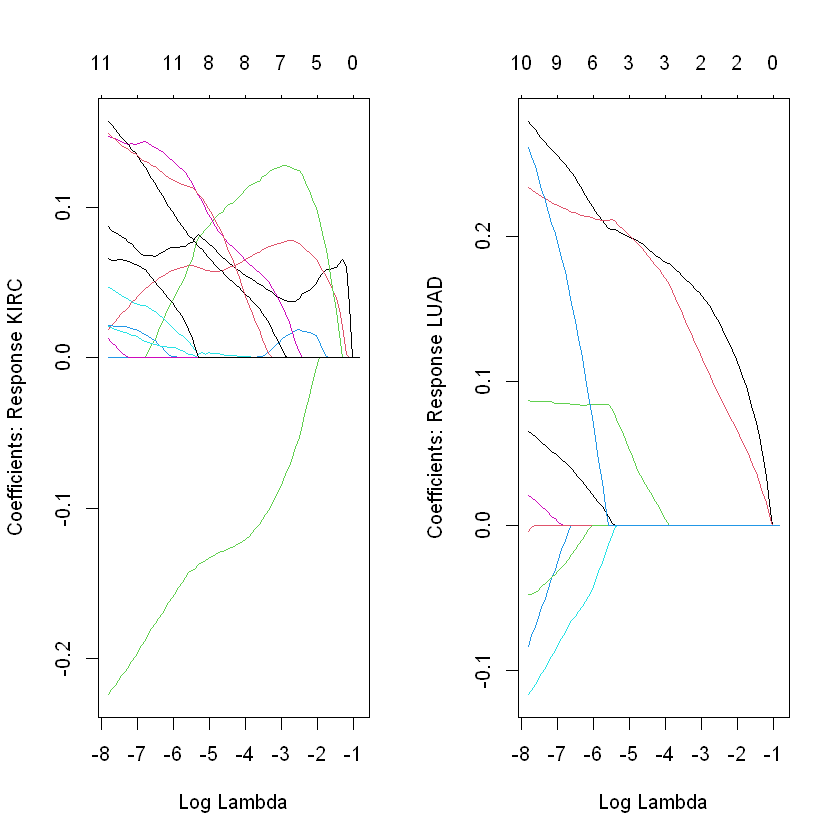

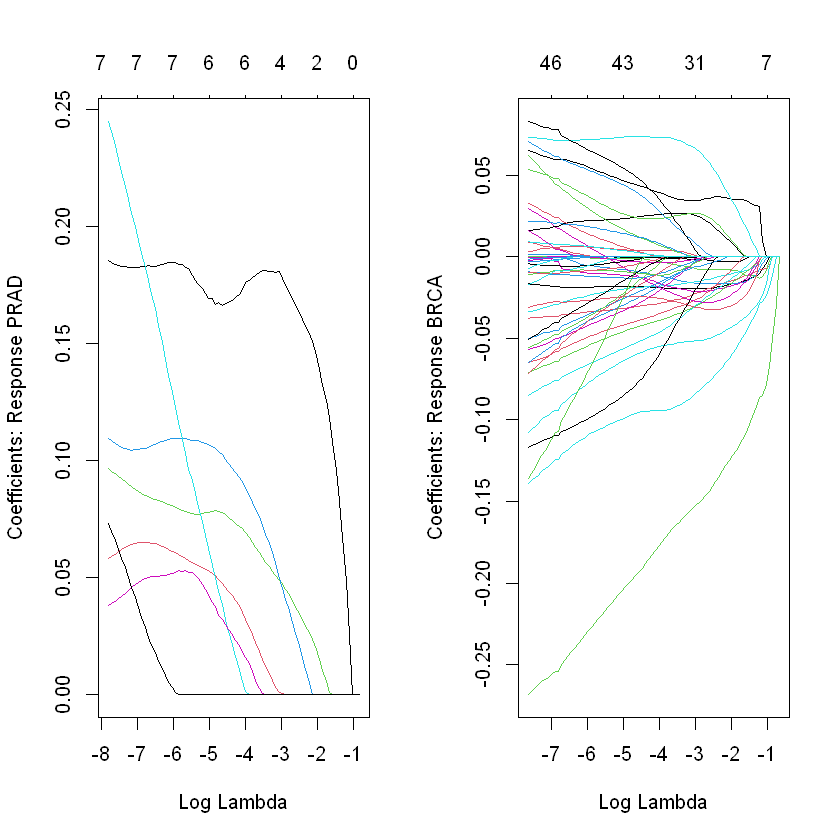

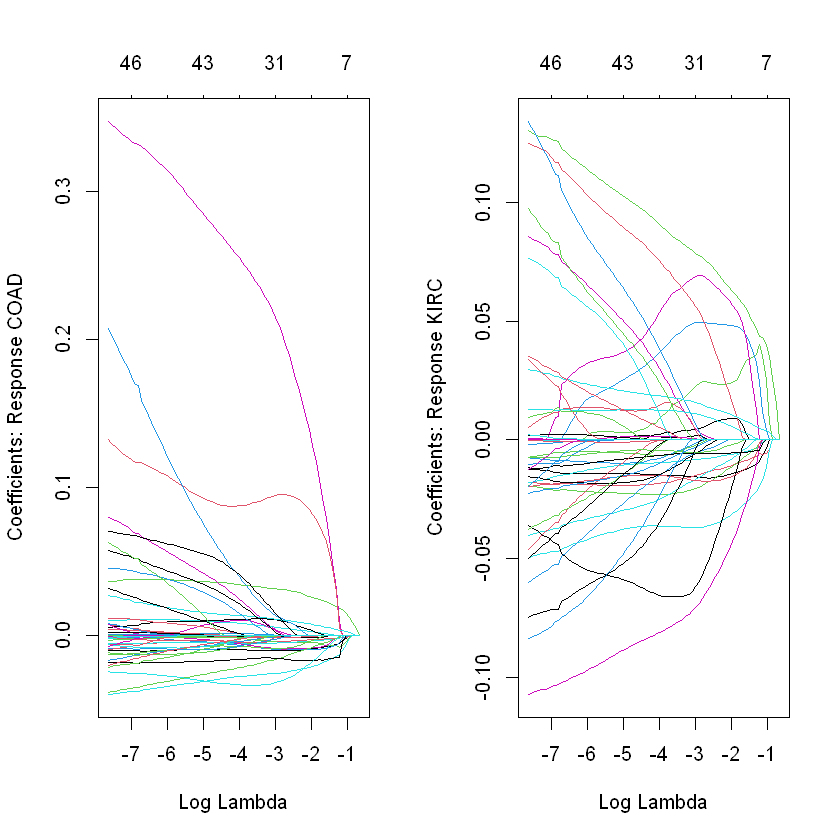

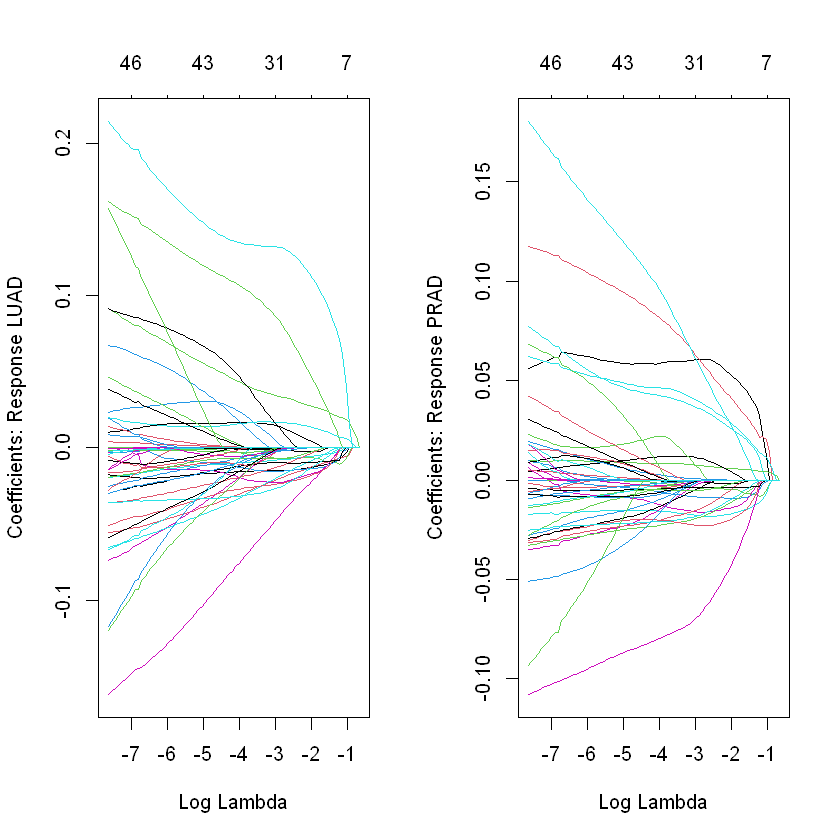

1
PRAD
LUAD
PRAD
PRAD
BRCA
PRAD
KIRC
PRAD
BRCA
PRAD


1
PRAD
LUAD
PRAD
PRAD
BRCA
PRAD
KIRC
PRAD
BRCA
PRAD


1
PRAD
LUAD
PRAD
PRAD
BRCA
PRAD
KIRC
PRAD
BRCA
PRAD


1
PRAD
LUAD
PRAD
PRAD
BRCA
PRAD
KIRC
PRAD
BRCA
PRAD


ERROR: Error in eval(expr, envir, enclos): object 'labels.LUAD' not found


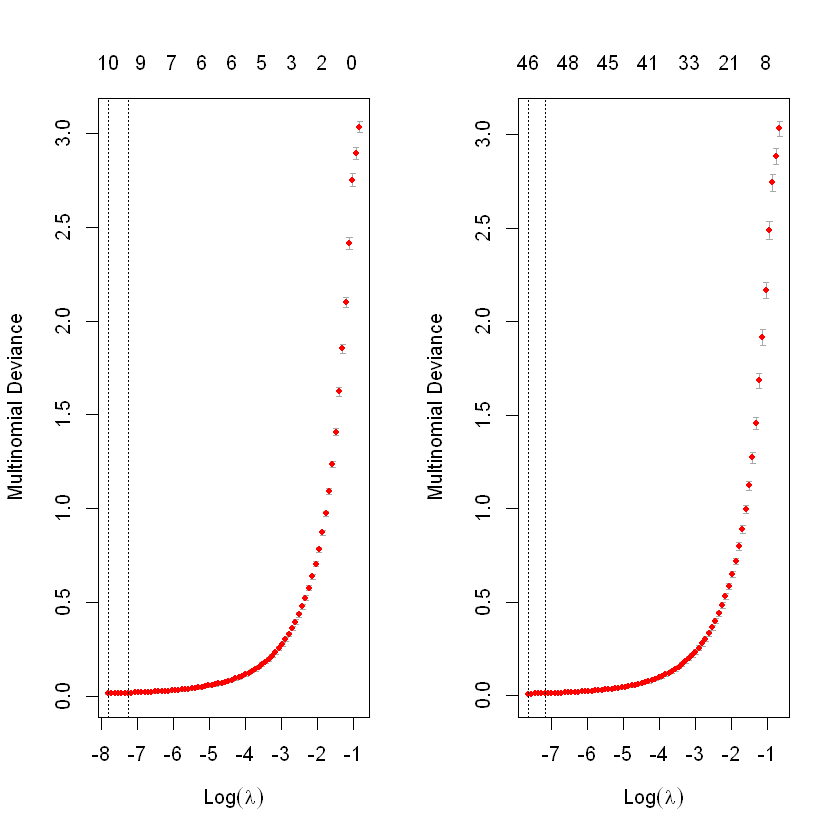

In [1]:
## ---- Loading Packages Into Memory -------------------------------------------
library(readr)
library("ggplot2")
library("dplyr")
library("tidyr")
library("stringr")
#library("purr")
library("forcats")
library("grDevices")
library("data.table")
library("tidyverse")
library("latex2exp")
library("irlba") 
library("plot3D")
library("rgl")
library("kableExtra")
library("NbClust")
library(factoextra)
library(diceR)
#library(cluster)
library(FactoMineR)
library("class")
library("MASS")
library("FNN")
library("mclust") # Good for GMM clustering/ BIC
library(ClusterR)
library(ConsensusClusterPlus)
library(ALL)
library(datasets)
library(irlba)
library(network)
library(huge)
library(ElemStatLearn)
library(gplots)
library(ClustAssess)
library(nsprcomp)
library(Matrix)

## ---- Colour Palette ---------------------------------------------------------
cbPalette <- c(
  "#999999", "#E69F00", "#56B4E9", "#009E73",
  "#F0E442", "#0072B2", "#D55E00", "#CC79A7") # colour-blind friendly palette




# loading dataset 
data <- as_tibble(read.csv("data.csv",
                           header = TRUE,
                           row.names = 1))


labels <- as_tibble(read.csv("labels.csv",
                             header = TRUE,
                             row.names = 1))

## ---- Filtering using F-statistic --------------------------------------------



data.no.const <- as.matrix(data[, apply(data, 2, var) > 0]) # remove all constant feat


# f.value <- function(x,y){
#   
#  return <- anova(lm(x ~ y))$"F value"[1]
#   
#   
# }

lab <- as.matrix(labels)

F.value <- apply(data.no.const, 2, function(x) anova(lm(x ~ lab))$'F value'[1])



data.filtered <- data.no.const[, order(F.value, decreasing = TRUE)[1:200]]

library(glmnet)
#install.packages("nnet")

library(nnet)

mod.multi <- glmnet(
  x = data.filtered, y = lab,
  family = "multinomial",
  #type.multinomial = "grouped"
)

# mod.multicla.ung.nnet <- multinom(
#   lab ~ data.filtered,
#   data = as.data.frame(data.filtered),
#   #type.multinomial = "grouped"
# )



mod.multi.group <- glmnet(
  x = data.filtered, y = lab,
  family = "multinomial",
  type.multinomial = "grouped"
)


# type.multinomial allows the usage of grouped lasso 
# penalty if you specify "grouped"



# Plot figure with l2 norm and penalty
par(mfrow = c(1,2))

plot(mod.multi, 
     xvar = "lambda", 
     label = TRUE,
     type.coef = "2norm")


plot(mod.multi.group, 
     xvar = "lambda", 
     label = TRUE,
     type.coef = "2norm")


# Plot figure with coef and penalty
par(mfrow = c(1,2))

plot(mod.multi, 
     xvar = "lambda", 
     label = TRUE,
     type.coef = "coef")


plot(mod.multi.group, 
     xvar = "lambda", 
     label = TRUE,
     type.coef = "coef")

cv.multi <- cv.glmnet(data.filtered, lab, family = "multinomial")

cv.multi.group <- cv.glmnet(data.filtered, lab, family = "multinomial", 
                            type.multinomial = "grouped")

par(mfrow = c(1,2))

plot(cv.multi)

plot(cv.multi.group)

# Predict optimal selected lambda:

predict(cv.multi, newx = data.filtered[1:10,], s = "lambda.min", type = "class")

predict(cv.multi.group, newx = data.filtered[1:10,], s = "lambda.min", type = "class")

predict(cv.multi, newx = data.filtered[1:10,], s = "lambda.1se", type = "class")

predict(cv.multi.group,  newx = data.filtered[1:10,], s = "lambda.min", type = "class")


# Convert to matrix for each class

coef.BRCA <- as.matrix(coef(cv.multi)$"BRCA")
coef.LUAD <- as.matrix(coef(cv.multi)$"LUAD")
coef.KIRC <- as.matrix(coef(cv.multi)$"KIRC")
coef.PRAD <- as.matrix(coef(cv.multi)$"PRAD")
coef.COAD <- as.matrix(coef(cv.multi)$"COAD")


non.zero.coef.BRCA <- coef.BRCA[coef.BRCA != 0,]
non.zero.coef.LUAD <- coef.LUAD[coef.LUAD != 0,]
non.zero.coef.KIRC <- coef.KIRC[coef.KIRC != 0,]
non.zero.coef.PRAD <- coef.PRAD[coef.PRAD != 0,]
non.zero.coef.COAD <- coef.COAD[coef.COAD != 0,]




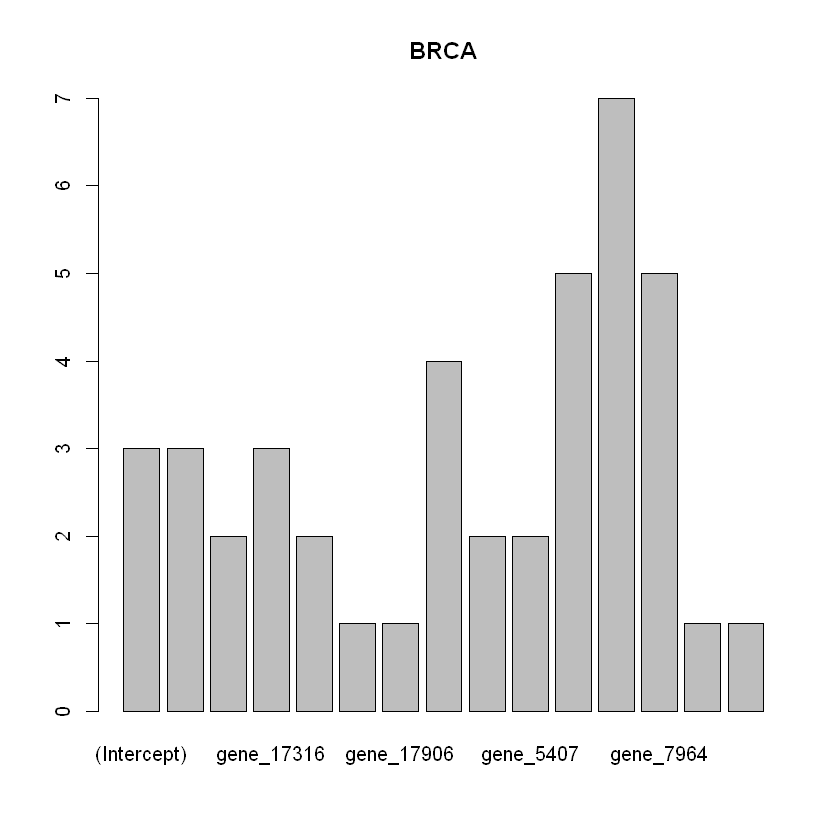

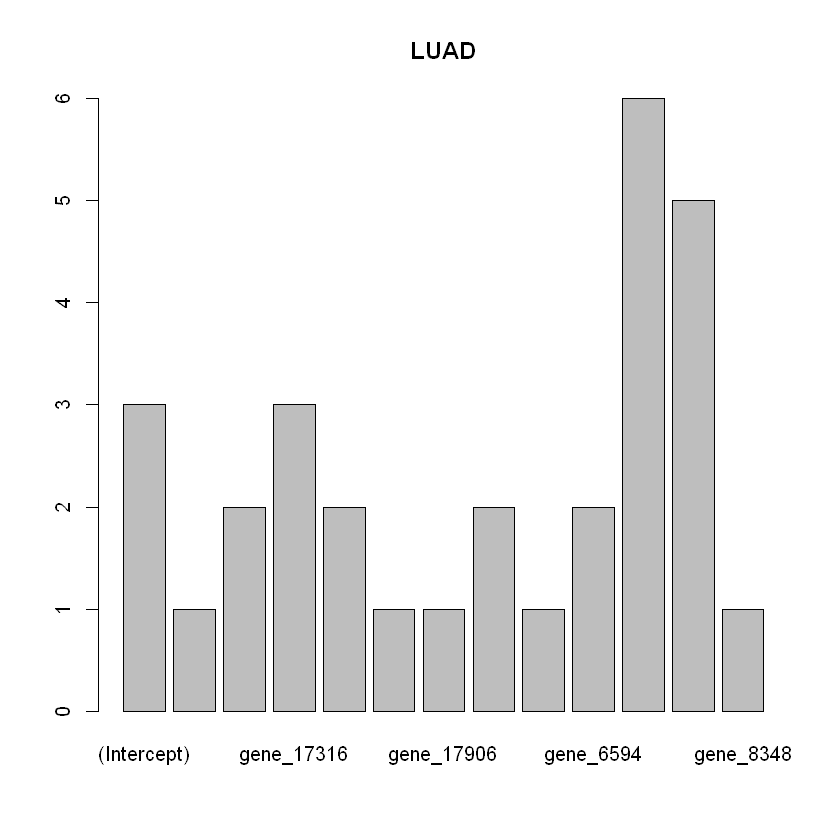

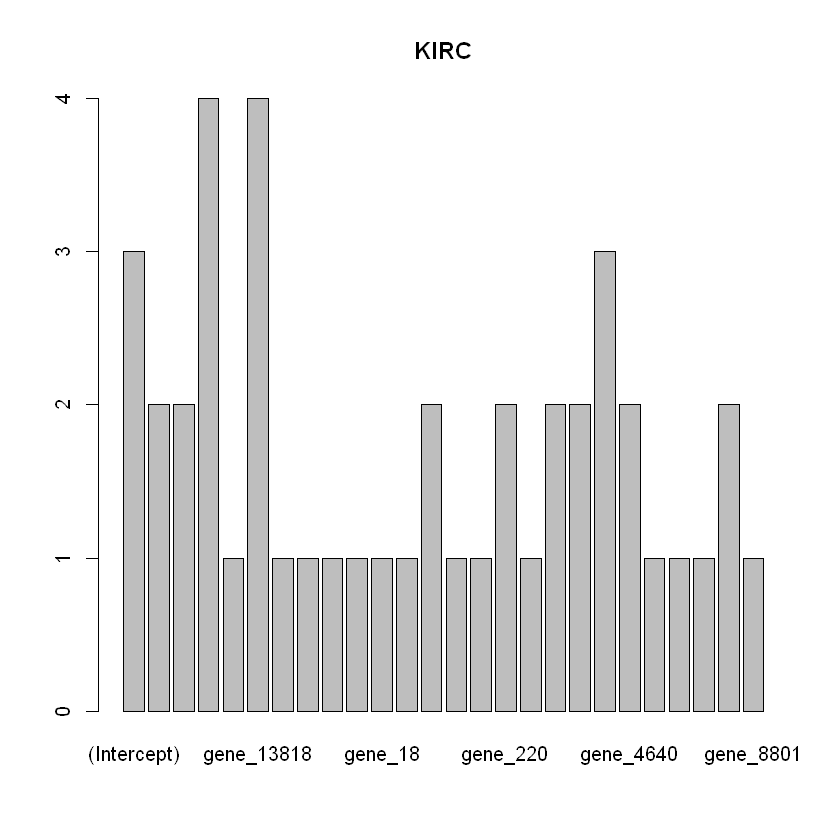

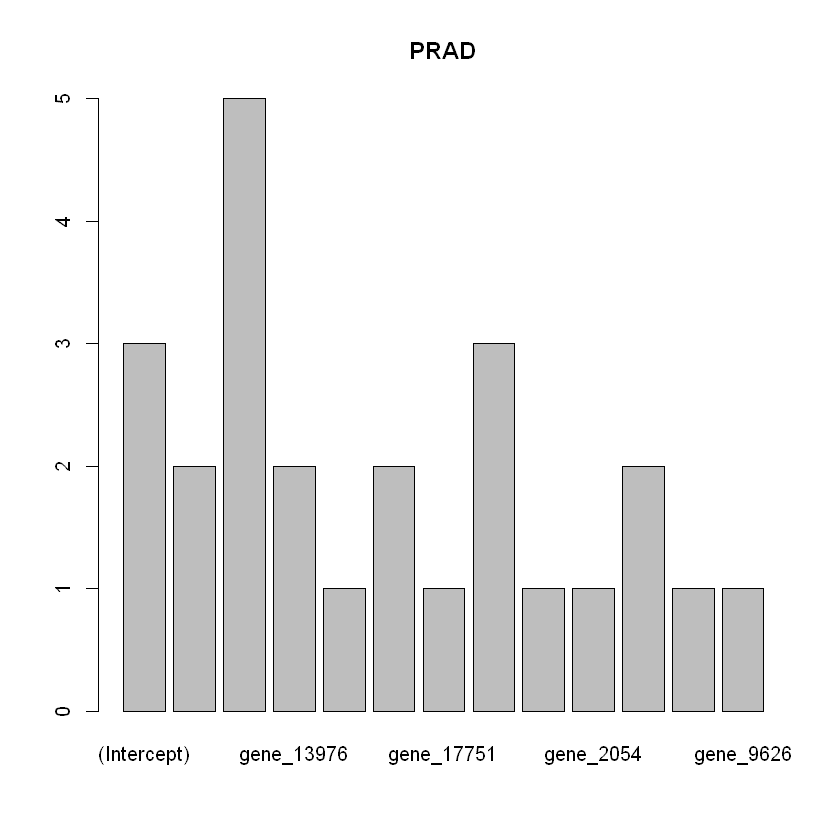

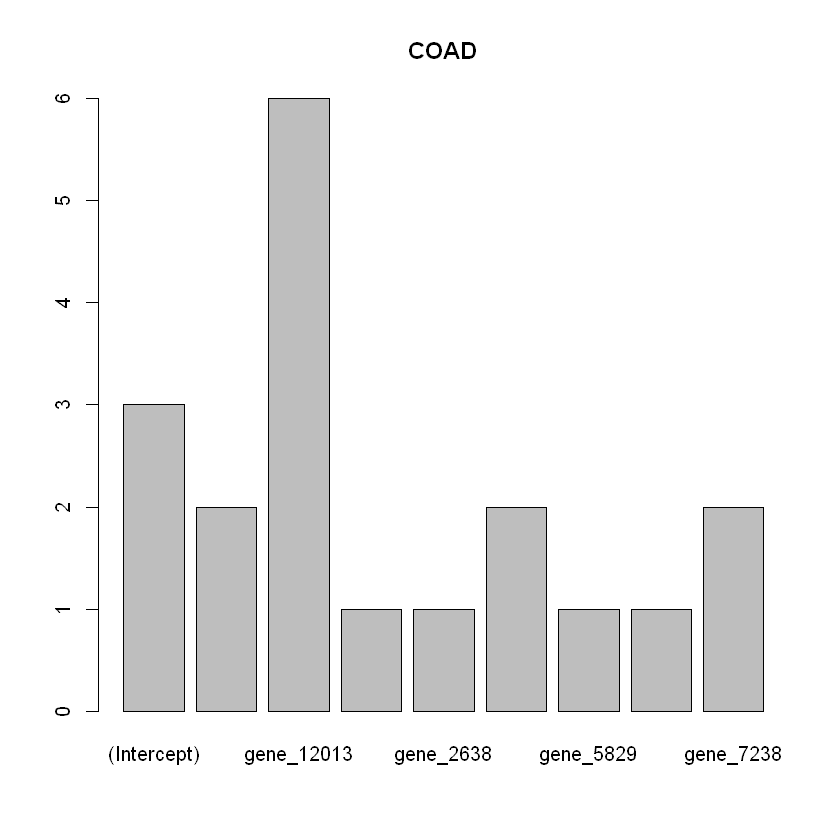

In [6]:
M  = 3



boot.data <- matrix(0, nrow = 200, ncol = 801)

# Record how often each feature got selected for each class across bootstrap samples. 
# You will essentially get a histogram where larger peaks indicate that a feature was chosen more often.

labels.BRCA <- matrix(0, nrow = 100, ncol = M)
labels.LUAD <- matrix(0, nrow = 100, ncol = M)
labels.KIRC <- matrix(0, nrow = 100, ncol = M)
labels.PRAD <- matrix(0, nrow = 100, ncol = M)
labels.COAD <- matrix(0, nrow = 100, ncol = M)

for ( i in 1:M) {
  
  boot.data <- data.filtered[,sample(ncol(data.filtered), size = 200, replace = TRUE)]
  
 
  
  mod <- glmnet(
    x = boot.data, y = lab,
    family = "multinomial")
  
  cv.mod <- cv.glmnet(boot.data, lab, family = "multinomial")
  
  coef.BRCA <- as.matrix(coef(cv.mod)$"BRCA")
  coef.LUAD <- as.matrix(coef(cv.mod)$"LUAD")
  coef.KIRC <- as.matrix(coef(cv.mod)$"KIRC")
  coef.PRAD <- as.matrix(coef(cv.mod)$"PRAD")
  coef.COAD <- as.matrix(coef(cv.mod)$"COAD")
  
  
  non.zero.coef.BRCA <- coef.BRCA[coef.BRCA != 0,]
  non.zero.coef.LUAD <- coef.LUAD[coef.LUAD != 0,]
  non.zero.coef.KIRC <- coef.KIRC[coef.KIRC != 0,]
  non.zero.coef.PRAD <- coef.PRAD[coef.PRAD != 0,]
  non.zero.coef.COAD <- coef.COAD[coef.COAD != 0,]
  
  labels.BRCA[c(1:length(non.zero.coef.BRCA)),i] <- labels(non.zero.coef.BRCA)
  
  labels.LUAD[c(1:length(non.zero.coef.LUAD)),i] <- labels(non.zero.coef.LUAD)
  
  labels.KIRC[c(1:length(non.zero.coef.KIRC)),i] <- labels(non.zero.coef.KIRC)
  
  labels.PRAD[c(1:length(non.zero.coef.PRAD)),i] <- labels(non.zero.coef.PRAD)
  
  labels.COAD[c(1:length(non.zero.coef.COAD)),i] <- labels(non.zero.coef.COAD)
  
}

all.genes.BRCA <- labels.BRCA[labels.BRCA != 0]

barplot(table(all.genes.BRCA), main = "BRCA")

all.genes.LUAD <- labels.BRCA[labels.LUAD != 0]

barplot(table(all.genes.LUAD), main = "LUAD")

all.genes.KIRC <- labels.KIRC[labels.KIRC != 0]

barplot(table(all.genes.KIRC), main = "KIRC")

all.genes.PRAD <- labels.PRAD[labels.PRAD != 0]

barplot(table(all.genes.PRAD), main = "PRAD")

all.genes.COAD <- labels.COAD[labels.COAD != 0]

barplot(table(all.genes.COAD), main = "COAD")
